# **Analyse the approximation limit**

In [191]:
import pandas as pd

x = [[],[],[],[],[],[]] #6 dados de angulos
t = [[],[],[],[],[],[]] #6 dados de tempo
for i in range(len(x)):
    data = pd.read_csv(f'altos_angulos_pos_{i+1}.txt', sep = "	")
    x[i] = data['Posicao angular ( rad )'].values
    t[i] = data['Tempo ( s )'].values

In [192]:
from scipy.signal import find_peaks
import numpy as np

ind = [[],[],[],[],[],[]]
for i in range(len(x)):
    peaks= find_peaks(x[i],height=0)
    ind[i] = peaks[0]

#variaveis que vou usar
th= [np.ones(len(ind[0])),np.ones(len(ind[1])),np.ones(len(ind[2])),
      np.ones(len(ind[3])),np.ones(len(ind[4])),np.ones(len(ind[5]))] #picos
t_peaks =  [np.ones(len(ind[0])),np.ones(len(ind[1])),np.ones(len(ind[2])),
      np.ones(len(ind[3])),np.ones(len(ind[4])),np.ones(len(ind[5]))] #tempos de picos
#arrumar tempos e picos

for j in range(len(ind)):
    u = 0
    for i in ind[j]:
        t_peaks[j][u]=t[j][i]
        th[j][u] = x[j][i]
        u=u+1

for j in range(len(ind)):
    print(th[j][0])

0.379
0.54
0.748
1.158
0.88
0.223


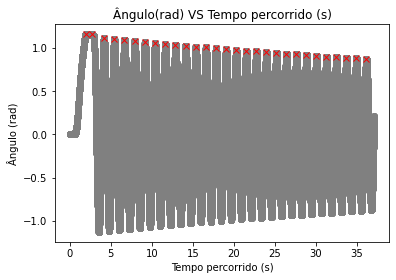

In [193]:
from matplotlib import pyplot as plt

plt.plot(t[3],x[3],'o',color='gray')
plt.plot(t_peaks[3], th[3], "x",color='red')


plt.ylabel('Ângulo (rad)')
plt.xlabel('Tempo percorrido (s)')
#plt.ylim(0,0.27)
#plt.xlim(2,15)
plt.title('Ângulo(rad) VS Tempo percorrido (s)')
plt.show()

In [200]:
T1 = [[],[],[],[],[],[]] #picos
for u in range(6):
    for i in range(len(t_peaks[u])-1):
        T1[u].append(round(t_peaks[u][i+1]-t_peaks[u][i],3))
    
print(T1)#printar um intervalo ae

[[1.173, 1.163, 1.165, 1.163, 1.165, 1.165, 1.165, 1.163, 1.164, 1.164, 1.165, 1.162, 1.164, 1.164, 1.162, 1.163, 1.163, 1.164, 1.163, 1.162, 1.163, 1.162, 1.164], [1.175, 1.175, 1.175, 1.175, 1.175, 1.174, 1.174, 1.174, 1.174, 1.172, 1.173, 1.173, 1.173, 1.172, 1.172, 1.171, 1.172, 1.173, 1.17, 1.171, 1.171, 1.17, 1.173, 1.169, 1.169, 1.17], [1.46, 1.193, 1.187, 1.19, 1.189, 1.189, 1.188, 1.188, 1.187, 1.189, 1.185, 1.186, 1.185, 1.188, 1.183, 1.183, 1.186, 1.182, 1.182, 1.184, 1.182, 1.183, 1.18, 1.182, 1.183, 1.178, 1.182, 1.178, 1.18, 1.179], [0.682, 1.47, 1.25, 1.249, 1.246, 1.245, 1.243, 1.242, 1.238, 1.236, 1.235, 1.233, 1.233, 1.229, 1.229, 1.227, 1.226, 1.223, 1.225, 1.22, 1.22, 1.221, 1.216, 1.216, 1.216, 1.216, 1.212, 1.212], [1.284, 1.206, 1.204, 1.205, 1.203, 1.203, 1.202, 1.201, 1.201, 1.199, 1.2, 1.198, 1.197, 1.198, 1.195, 1.197, 1.194, 1.195, 1.193, 1.193, 1.193, 1.194, 1.189, 1.191, 1.191, 1.19, 1.189], [1.15, 1.16, 1.155, 1.155, 1.155, 1.16, 1.16, 1.15, 1.16, 1.155, 

In [202]:
T_m1 = np.ones(len(x))
e_Tm1=np.ones(len(x))
for u in range(len(x)):
    sum=0
    for i in T1[u]:
        sum = sum+i
    T_m1[u]=sum/len(T1[u])

for u in range(len(x)):
    et=0
    for i in T1[u]:
        et= et+ (T_m1[u]-i)**2
    e_Tm1[u]=np.sqrt(et/(len(T1[u])*(len(T1[u])-1)))
    print(e_Tm1)
    #print(f'T = {round(T_m1[u],4)}+-{round(eT_m1[u],4)}')

[4.64035661e-04 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[4.64035661e-04 3.77236918e-04 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[4.64035661e-04 3.77236918e-04 9.20858545e-03 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[4.64035661e-04 3.77236918e-04 9.20858545e-03 2.17466994e-02
 1.00000000e+00 1.00000000e+00]
[4.64035661e-04 3.77236918e-04 9.20858545e-03 2.17466994e-02
 3.36651732e-03 1.00000000e+00]
[0.00046404 0.00037724 0.00920859 0.0217467  0.00336652 0.00065016]


In [203]:
#Tudo no SI
u = 0.004
eu = 0.00003

r = 0.002
er = 0.00003

R=0.01263
eR=0.00003

R_1 =0.00405
eR_1 =0.00003

M = 0.02839
eM = 0.00002

m = 0.07553
em = 0.00001

l=0.35500
el=0.00005

L = 0.026
eL = 0.00005

h = 0.02
eh=0.00005

g=9.8

z = np.array([0.3345,0.156])
ez = np.array([0.00005,0.00005])

Lcm= np.ones(2)
eLcm= np.ones(2)
for i in range(2):
    Lcm[i]= (M*(l-L)/2+m*(h/2+z[i]))/(M+m)
    eLcm[i] = np.sqrt(2*(M*el/(2*M+2*m))**2+(m*eh/(2*M+2*m))**2+(m*ez[i]/(M+m))**2 +2*em**2*((l-L-(M*(l-L)+m*(h/2+z[i])*2)/(4*(M+m)**2))**2 ))
print(Lcm)
print(eLcm)

[0.29532564 0.16559021]
[4.45257075e-05 4.22827352e-05]


In [204]:
I_e=np.ones(len(T1))
e_Ie=np.ones(len(T1))
for i in range(len(T1)):
    I_e[i]=T_m1[i]**2*(M+m)*g*Lcm[0]/(4*np.pi**2)
    e_Ie[i]=np.sqrt( (T_m1[i]*(M+m)*g*Lcm[0]*eT_m1[1])**2+ 2*(T_m1[i]**2*g*Lcm[0]*eM)**2+(T_m1[i]**2*(M+m)*g*eLcm[0])**2)/(2*np.pi)

    print(f'I_EXP{i}= {I_e[i]} +- {e_Ie[i]}')


I_EXP0= 0.010321436374082608 +- 2.9136262791577094e-05
I_EXP1= 0.010473511801637221 +- 2.945364377826826e-05
I_EXP2= 0.010855679462886776 +- 3.024942562952829e-05
I_EXP3= 0.011306130651232954 +- 3.118430228033733e-05
I_EXP4= 0.010973954290199144 +- 3.049520864097255e-05
I_EXP5= 0.010177873615536811 +- 2.8836254980621144e-05


In [205]:
import numpy as np

I=0
eI =0
I = m* (h**2/3+(R**2+R_1**2)/4+(z[0]+h/2)**2)+M*(1/4*(u**2+r**2)+1/3*(L**2-l*L+l**2)) 
eI = np.sqrt((em* (h**2/3+R**2/4+z[0]**2))**2 + (eM*(1/4*(u**2+r**2)+1/3*(L**2-l*L+l**2)))**2+(m* (h*2/3)*eh)**2 + m**2*(R*2/4*eR)**2 +m**2*(z[0]*2*ez[0])**2+ (M*(1/4*(u*2*eu)))**2+ (M*(1/4*(r*2*er)))**2 + (M*(1/3*(L*2-l)*eL))**2+(M*(1/3*(-L+l*2)*el)**2))
print(f'I_{1} = ({round(I,6)}+-{round(eI,6)})')

I_1 = (0.010089+-3e-06)


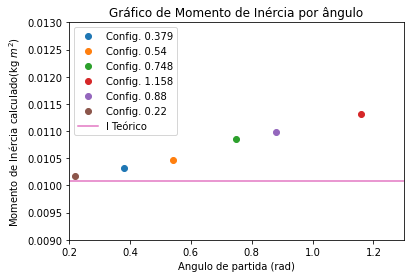

In [210]:
h = np.array([0.379,0.54,0.748,1.158,0.88,0.22]) 
color = ['gray','blue','red','yellow','green','']

for i in range(len(h)):
    #plt.plot(h[i],I_e[i],'o', label=f'Config. {theta[i]}')
    plt.plot(h[i],I_e[i],'o',label=f'Config. {h[i]}')
i=np.linspace(0,1.3,61)
plt.plot(i,np.ones(len(i))*I,'-',label='I Teórico')

plt.ylim(0.009,0.013)
#plt.ylim(-0.7,0.7)
plt.xlim(0.2,1.3)
plt.legend()

plt.title('Gráfico de Momento de Inércia por ângulo')
plt.ylabel('Momento de Inércia calculado(kg $m^2$)')
plt.xlabel('Angulo de partida (rad)')
plt.show()

In [179]:
from scipy.optimize import curve_fit
from scipy import optimize 


def model_fit(x, a, b):
    return a*x+b

a_opt = 0
b_opt=0
std=0

parameters, covariance = curve_fit(model_fit,h,I_e,p0=[0.18,0.02])
a_opt, b_opt= parameters

#calculo do erro
std = np.sqrt(np.diag(covariance))


print(f'a={a_opt}+-{std[0]} ')
print(f'b={b_opt}+-{std[1]} ')

a=0.0013010278035066694+-7.919053327278382e-05 
b=0.009822080913609305+-6.245627474814408e-05 


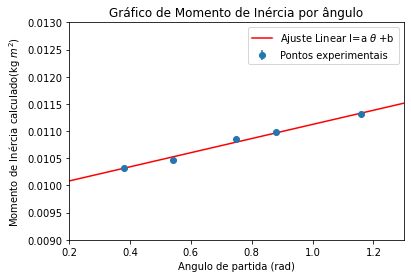

In [180]:
plt.errorbar(h,I_e,yerr=e_Ie,fmt='o',label='Pontos experimentais')
k=np.linspace(0,2,60)
plt.plot(k,k*a_opt+b_opt, '-',color='red',label='Ajuste Linear I=a $ \\theta $ +b')

plt.ylim(0.009,0.013)
#plt.ylim(-0.7,0.7)
plt.xlim(0.2,1.3)

plt.legend()
plt.title('Gráfico de Momento de Inércia por ângulo')
plt.ylabel('Momento de Inércia calculado(kg $m^2$)')
plt.xlabel('Angulo de partida (rad)')

plt.show()

In [167]:
import sympy as sp

R,te,z,r,h, u, l, L =sp.symbols('R \theta z r h u l L')

u = sp.integrate(np.sqrt(R**2*np.sin(te)**2+z**2),z, (-h/2,h/2))

TypeError: loop of ufunc does not support argument 0 of type Symbol which has no callable sin method